<a href="https://colab.research.google.com/github/AnabelBerumen/DataScientist/blob/main/estad%C3%ADstica_inferencial/Tipos_de_pruebas_de_hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [5]:
url = 'https://static.platzi.com/media/public/uploads/iris_378353e2-1f85-42cb-b260-80487203ba4a.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Distribución t de Student:
  
  se usa para estimar una media poblacional normalmente distribuida.


$$t\ =\frac{(x1\ -x2)}{\sqrt{\frac{( s1)^{2}}{n1} +\frac{( s2)^{2}}{n2}}}$$

* Muestra pequeña
* Desconocemos la desviación estándar

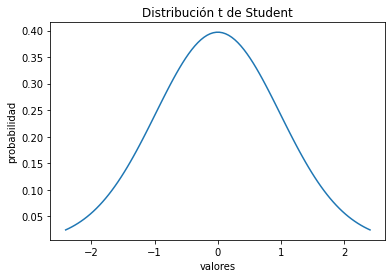

In [ ]:
# Graficando t de Student
df = 50 # parametro de forma.
t = st.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

In [8]:
iris.shape

(150, 5)

## Comprovación de hipotesis
$$SE\ =\frac{\sigma }{\sqrt{N}}$$

In [6]:
se_length = iris.std()['sepal-length']/np.sqrt(10)
se_width = iris.std()['sepal-width']/np.sqrt(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  




$$SED\ =\ \sqrt{\sigma _{1}^{2} /\ N_{1} +\sigma _{1}^{2} /\ N_{2}}$$

In [9]:
sed = np.sqrt((se_length**2) + (se_width**2))

$$t\ =\frac{(\overline{x} 1\ -\overline{x} 2)}{SED}$$
## ---
$$t\ =\frac{(x1\ -x2)}{\sqrt{\frac{( s1)^{2}}{n1} +\frac{( s2)^{2}}{n2}}}$$

In [10]:
t_stat = (iris.mean()['sepal-length']- iris.mean()['sepal-width'])/sed
t_stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


9.436693738890318

In [11]:
p = ttest_ind(iris['sepal-length'], iris['sepal-width'])
p

Ttest_indResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112)

Coeficiente de Pearson:

Para medir la dependencia lineal(correlación) entre dos variables aleatorias cuantitativas.


$$\rho =\frac{\sum _{i=1}^{n}( x_{i} \ -\ \overline{x})( y_{i} \ -\ \overline{y})\underset{}{\overset{}{}}}{( n\ -\ 1) s_{x} s_{y}}$$



* Variables cuantitativas de cualquier len(muestra)


  | Término	  | Description  |
  | ------------- | ------------- |
	|$$\overline{x}$$|media de la muestra para la primera variable|
  |$$s_{x}$$|	desviación estándar simple para la primera variable|
  |$$\overline{y}$$|media de la muestra para la segunda variable|
  |$$s_{y}$$|desviación estándar de la muestra para la segunda variable|
  |$$n\$$ |	número de observaciones|

In [14]:
iris['sepal-length'].corr(iris['sepal-width'])

-0.10936924995064937

Evaluamos la coorelación

In [15]:
st.pearsonr(iris['sepal-length'],iris['sepal-width'])

(-0.10936924995064937, 0.1827652152713699)

Analisis de la varianza(ANOVA):

Para comparar la varianza entre las medias(promedio) de diferentes grupos.




El estadístico estudiado en el ANOVA, conocido como Fratio,sigue una distribución conocida como “F de Fisher-Snedecor”




In [16]:
f_oneway(iris['sepal-length'], iris['sepal-width'])

F_onewayResult(statistic=1335.7678308241748, pvalue=3.9878381148486907e-112)